### Liberaries

In [531]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.linear_model import LinearRegression

### Data Preprocessing

In [426]:
# Load data
df_purchase=pd.read_csv('purchase data.csv')

# Import Scaler
scaler=pickle.load(open('scaler.pickle','rb'))
# Import pca
pca=pickle.load(open('pca.pickle','rb'))
# Import kmeans
kmeans_pca=pickle.load(open('kmeans_pca.pickle','rb'))

# Standardization
features=df_purchase[['Sex','Marital status', 'Age', 'Education','Income','Occupation', 'Settlement size']]
df_purchase_segm_std=scaler.transform(features)

# Apply PCA
df_purchase_segm_pca=pca.transform(df_purchase_segm_std)

# Segment data
purchase_segm_kmeans_pca=kmeans_pca.predict(df_purchase_segm_pca)

# Create a copy of data
df_purchase_predictors=df_purchase.copy()

# Add Segment Labels
df_purchase_predictors['Segment']=purchase_segm_kmeans_pca
segment_dummies=pd.get_dummies(purchase_segm_kmeans_pca,prefix='Segment',prefix_sep='_')
df_purchase_predictors=pd.concat([df_purchase_predictors,segment_dummies],axis=1)

df_pa=df_purchase_predictors

### Purchase Probability Model

In [427]:
Y=df_pa['Incidence']

In [428]:
X=pd.DataFrame()
X['Mean_Price']=(df_pa['Price_1']+df_pa['Price_2']+df_pa['Price_3']+df_pa['Price_4']+df_pa['Price_5'])/5

In [429]:
model_purchase=LogisticRegression(solver='sag')
model_purchase.fit(X,Y)

LogisticRegression(solver='sag')

In [430]:
model_purchase.coef_

array([[-2.34795076]])

### Price Elasticity of Purchase Probability

In [431]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [432]:
price_range=np.arange(0.5,3.5,0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [433]:
df_price_range=pd.DataFrame(price_range)

In [434]:
Y_pr=model_purchase.predict_proba(df_price_range)

In [435]:
Y_pr

array([[0.08212582, 0.91787418],
       [0.08391319, 0.91608681],
       [0.08573582, 0.91426418],
       [0.08759426, 0.91240574],
       [0.08948904, 0.91051096],
       [0.0914207 , 0.9085793 ],
       [0.09338977, 0.90661023],
       [0.09539681, 0.90460319],
       [0.09744234, 0.90255766],
       [0.09952691, 0.90047309],
       [0.10165105, 0.89834895],
       [0.10381529, 0.89618471],
       [0.10602018, 0.89397982],
       [0.10826624, 0.89173376],
       [0.110554  , 0.889446  ],
       [0.11288398, 0.88711602],
       [0.1152567 , 0.8847433 ],
       [0.11767268, 0.88232732],
       [0.12013243, 0.87986757],
       [0.12263645, 0.87736355],
       [0.12518523, 0.87481477],
       [0.12777927, 0.87222073],
       [0.13041905, 0.86958095],
       [0.13310505, 0.86689495],
       [0.13583772, 0.86416228],
       [0.13861752, 0.86138248],
       [0.1414449 , 0.8585551 ],
       [0.14432028, 0.85567972],
       [0.1472441 , 0.8527559 ],
       [0.15021674, 0.84978326],
       [0.

In [436]:
purchase_pr=Y_pr[:][:,1]

In [437]:
pe=model_purchase.coef_[:,0]*price_range*(1-purchase_pr)

In [438]:
df_price_elasticities=pd.DataFrame(price_range)

In [439]:
df_price_elasticities=df_price_elasticities.rename(columns={0:'Price_point'})
df_price_elasticities['Mean_PE']=pe
df_price_elasticities

,Price_point,Mean_PE
0,0.50,-0.096414
1,0.51,-0.100482
2,0.52,-0.104678
3,0.53,-0.109004
4,0.54,-0.113463
5,0.55,-0.118058
6,0.56,-0.122794
7,0.57,-0.127673
8,0.58,-0.132698
9,0.59,-0.137874


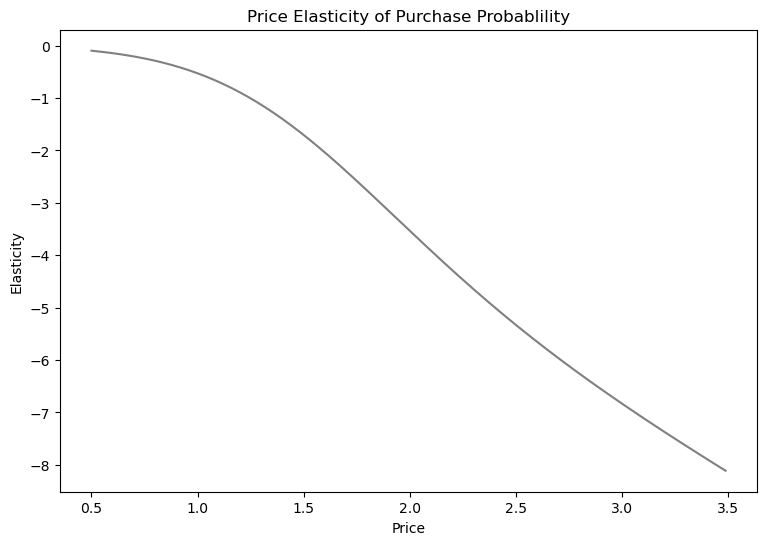

In [440]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probablility')
plt.show()

## Purchase Probability by Segment

#### Segment 1 - Career-Focused

In [441]:
df_pa_segement_1 = df_pa[df_pa['Segment']==1]

In [442]:
Y=df_pa_segement_1['Incidence']

In [443]:
X=pd.DataFrame()

In [444]:
X['Mean_Price']=(df_pa_segement_1['Price_1'] +\
                 df_pa_segement_1['Price_2'] +\
                 df_pa_segement_1['Price_3'] +\
                 df_pa_segement_1['Price_4'] +\
                 df_pa_segement_1['Price_5'])/5

In [445]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X,Y)

LogisticRegression(solver='sag')

In [446]:
model_incidence_segment_1.coef_

array([[-1.71213821]])

In [447]:
Y_segment_1=model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:,1]
pe_segemnt_1=model_incidence_segment_1.coef_[:,0]* price_range*(1-purchase_pr_segment_1)

## Results

In [448]:
df_price_elasticities['PE_Segment_1']=pe_segemnt_1
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1
0,0.50,-0.096414,-0.119086
1,0.51,-0.100482,-0.123269
2,0.52,-0.104678,-0.127546
3,0.53,-0.109004,-0.131917
4,0.54,-0.113463,-0.136385
5,0.55,-0.118058,-0.140950
6,0.56,-0.122794,-0.145615
7,0.57,-0.127673,-0.150380
8,0.58,-0.132698,-0.155248
9,0.59,-0.137874,-0.160219


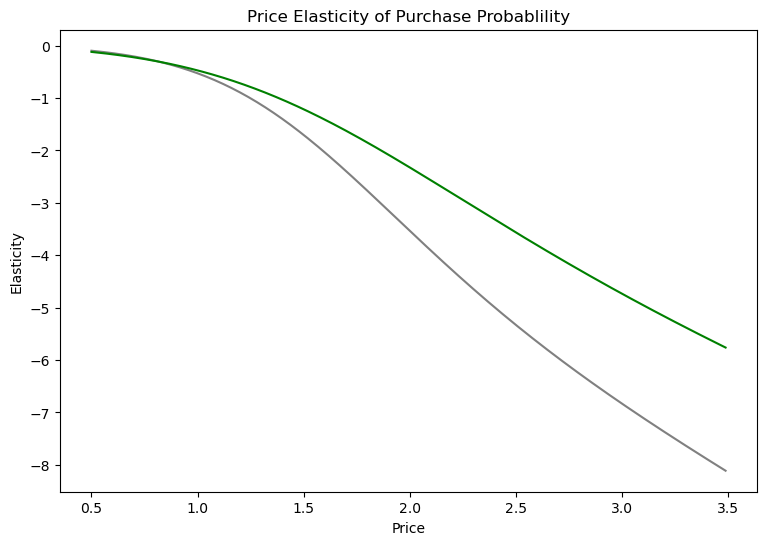

In [449]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segemnt_1,color='green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probablility')
plt.show()


## Segement 2 - Well-Off	

In [450]:
df_pa_segement_2 = df_pa[df_pa['Segment']==2]

In [451]:
Y=df_pa_segement_2['Incidence']
X=pd.DataFrame()
X['Mean_Price']=(df_pa_segement_2['Price_1'] +\
                 df_pa_segement_2['Price_2'] +\
                 df_pa_segement_2['Price_3'] +\
                 df_pa_segement_2['Price_4'] +\
                 df_pa_segement_2['Price_5'])/5

model_incidence_segment_2 = LogisticRegression(solver = 'sag')
model_incidence_segment_2.fit(X,Y)

# Calculate elasticities
model_incidence_segment_2.coef_

Y_segment_2=model_incidence_segment_2.predict_proba(df_price_range)
purchase_pr_segment_2 = Y_segment_2[:][:,1]
pe_segemnt_2=model_incidence_segment_2.coef_[:,0]* price_range*(1-purchase_pr_segment_2)

## Result

In [452]:
df_price_elasticities['PE_Segment_2']=pe_segemnt_2
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2
0,0.50,-0.096414,-0.119086,-0.168009
1,0.51,-0.100482,-0.123269,-0.172932
2,0.52,-0.104678,-0.127546,-0.177926
3,0.53,-0.109004,-0.131917,-0.182990
4,0.54,-0.113463,-0.136385,-0.188126
5,0.55,-0.118058,-0.140950,-0.193334
6,0.56,-0.122794,-0.145615,-0.198614
7,0.57,-0.127673,-0.150380,-0.203967
8,0.58,-0.132698,-0.155248,-0.209392
9,0.59,-0.137874,-0.160219,-0.214892


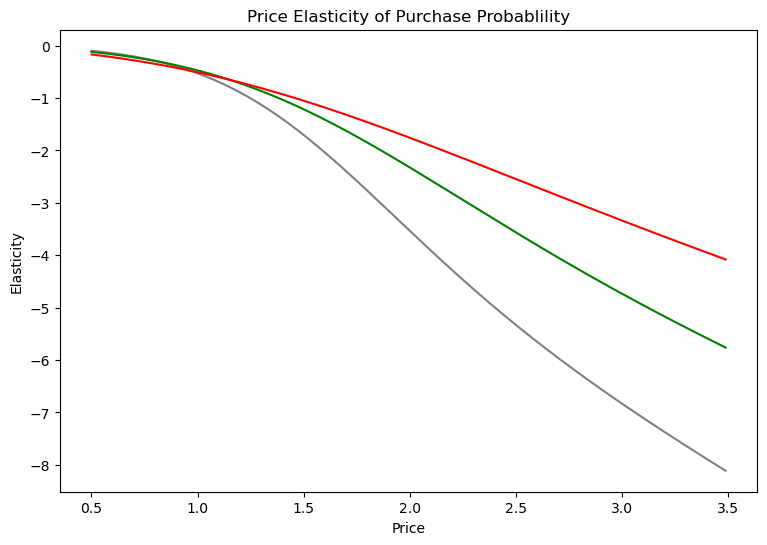

In [453]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segemnt_1,color='green')
plt.plot(price_range,pe_segemnt_2,color='r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probablility')
plt.show()


## Segement 0 - Standard

In [454]:
df_pa_segement_0 = df_pa[df_pa['Segment']==0]

In [455]:
Y=df_pa_segement_0['Incidence']
X=pd.DataFrame()
X['Mean_Price']=(df_pa_segement_0['Price_1'] +\
                 df_pa_segement_0['Price_2'] +\
                 df_pa_segement_0['Price_3'] +\
                 df_pa_segement_0['Price_4'] +\
                 df_pa_segement_0['Price_5'])/5

model_incidence_segment_0 = LogisticRegression(solver = 'sag')
model_incidence_segment_0.fit(X,Y)

# Calculate elasticities
model_incidence_segment_0.coef_

Y_segment_0=model_incidence_segment_0.predict_proba(df_price_range)
purchase_pr_segment_0 = Y_segment_0[:][:,1]
pe_segemnt_0=model_incidence_segment_0.coef_[:,0]* price_range*(1-purchase_pr_segment_0)

## Result

In [456]:
df_price_elasticities['PE_Segment_0']=pe_segemnt_0
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0
0,0.50,-0.096414,-0.119086,-0.168009,-0.211248
1,0.51,-0.100482,-0.123269,-0.172932,-0.217816
2,0.52,-0.104678,-0.127546,-0.177926,-0.224491
3,0.53,-0.109004,-0.131917,-0.182990,-0.231275
4,0.54,-0.113463,-0.136385,-0.188126,-0.238168
5,0.55,-0.118058,-0.140950,-0.193334,-0.245170
6,0.56,-0.122794,-0.145615,-0.198614,-0.252284
7,0.57,-0.127673,-0.150380,-0.203967,-0.259508
8,0.58,-0.132698,-0.155248,-0.209392,-0.266844
9,0.59,-0.137874,-0.160219,-0.214892,-0.274293


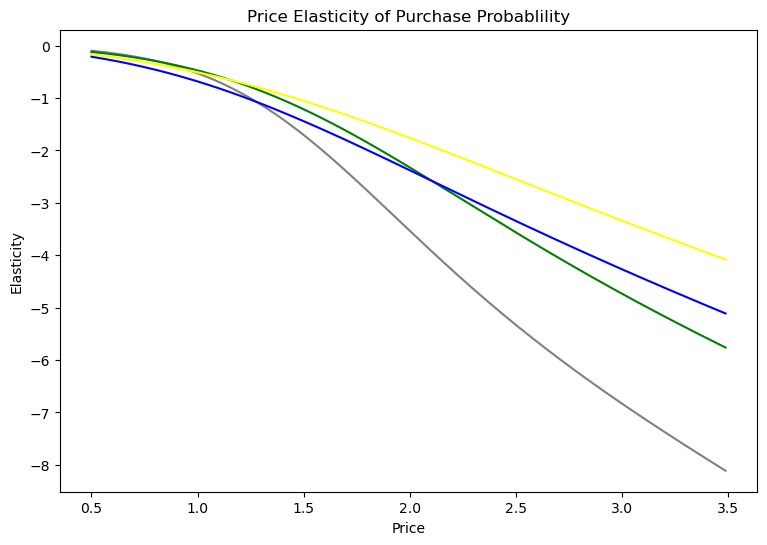

In [457]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segemnt_1,color='green')
plt.plot(price_range,pe_segemnt_2,color='yellow')
plt.plot(price_range,pe_segemnt_0,color='b')

plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probablility')
plt.show()


## Segement 3 - Fever-Opportunities

In [458]:
df_pa_segement_3 = df_pa[df_pa['Segment']==3]

In [459]:
Y=df_pa_segement_3['Incidence']
X=pd.DataFrame()
X['Mean_Price']=(df_pa_segement_3['Price_1'] +\
                 df_pa_segement_3['Price_2'] +\
                 df_pa_segement_3['Price_3'] +\
                 df_pa_segement_3['Price_4'] +\
                 df_pa_segement_3['Price_5'])/5

model_incidence_segment_3 = LogisticRegression(solver = 'sag')
model_incidence_segment_3.fit(X,Y)

# Calculate elasticities
model_incidence_segment_3.coef_

Y_segment_3=model_incidence_segment_3.predict_proba(df_price_range)
purchase_pr_segment_3 = Y_segment_3[:][:,1]
pe_segemnt_3=model_incidence_segment_3.coef_[:,0]* price_range*(1-purchase_pr_segment_3)

## Result

In [460]:
df_price_elasticities['PE_Segment_3']=pe_segemnt_3
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3
0,0.50,-0.096414,-0.119086,-0.168009,-0.211248,-0.030940
1,0.51,-0.100482,-0.123269,-0.172932,-0.217816,-0.032709
2,0.52,-0.104678,-0.127546,-0.177926,-0.224491,-0.034564
3,0.53,-0.109004,-0.131917,-0.182990,-0.231275,-0.036510
4,0.54,-0.113463,-0.136385,-0.188126,-0.238168,-0.038551
5,0.55,-0.118058,-0.140950,-0.193334,-0.245170,-0.040691
6,0.56,-0.122794,-0.145615,-0.198614,-0.252284,-0.042935
7,0.57,-0.127673,-0.150380,-0.203967,-0.259508,-0.045287
8,0.58,-0.132698,-0.155248,-0.209392,-0.266844,-0.047752
9,0.59,-0.137874,-0.160219,-0.214892,-0.274293,-0.050334


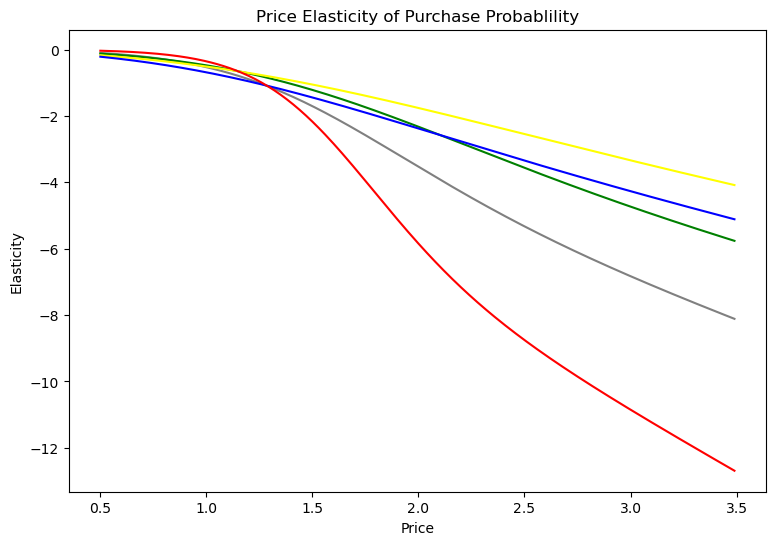

In [461]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segemnt_1,color='green')
plt.plot(price_range,pe_segemnt_2,color='yellow')
plt.plot(price_range,pe_segemnt_0,color='b')
plt.plot(price_range,pe_segemnt_3,color='r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probablility')
plt.show()


## Purchase Probability with promotion Feature

### Data Prearation

In [462]:
Y=df_pa['Incidence']

In [463]:
X=pd.DataFrame()
X['Mean_Price']=(df_pa['Price_1'] +\
                 df_pa['Price_2'] +\
                 df_pa['Price_3'] +\
                 df_pa['Price_4'] +\
                 df_pa['Price_5'])/5

In [464]:
X['Mean_Promotion']=(df_pa['Promotion_1'] +\
                 df_pa['Promotion_2'] +\
                 df_pa['Promotion_3'] +\
                 df_pa['Promotion_4'] +\
                 df_pa['Promotion_5'])/5

In [465]:
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


## Model Estimation

In [466]:
model_incidence_promotion = LogisticRegression(solver='sag')
model_incidence_promotion.fit(X,Y)
model_incidence_promotion.coef_

array([[-1.49395873,  0.56150311]])

## Price Elasticity with Promotion

In [467]:
# df_price_elasticities_promotion = pd.DataFrame(price_range)
# df_price_elasticities_promotion=df_price_elasticities_promotion.rename(columns={0:'Price_range'})

In [468]:
df_price_elasticities_promotion = pd.DataFrame(price_range)
df_price_elasticities_promotion=df_price_elasticities_promotion.rename(columns={0:'Mean_Price'})

In [469]:
# df_price_elasticities_promotion['Promotion']=1

In [470]:
df_price_elasticities_promotion['Mean_Promotion']=1

In [471]:
df_price_elasticities_promotion

,Mean_Price,Mean_Promotion
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1
5,0.55,1
6,0.56,1
7,0.57,1
8,0.58,1
9,0.59,1


In [472]:
Y_promotion=model_incidence_promotion.predict_proba(df_price_elasticities_promotion)

In [473]:
promo=Y_promotion[:,1]
price_elasticity_promo=(model_incidence_promotion.coef_[:,0] * price_range) * (1-promo)

In [474]:
df_price_elasticities['Elasticity_Promotion_1']=price_elasticity_promo
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096414,-0.119086,-0.168009,-0.211248,-0.030940,-0.125739
1,0.51,-0.100482,-0.123269,-0.172932,-0.217816,-0.032709,-0.129855
2,0.52,-0.104678,-0.127546,-0.177926,-0.224491,-0.034564,-0.134050
3,0.53,-0.109004,-0.131917,-0.182990,-0.231275,-0.036510,-0.138325
4,0.54,-0.113463,-0.136385,-0.188126,-0.238168,-0.038551,-0.142681
5,0.55,-0.118058,-0.140950,-0.193334,-0.245170,-0.040691,-0.147119
6,0.56,-0.122794,-0.145615,-0.198614,-0.252284,-0.042935,-0.151640
7,0.57,-0.127673,-0.150380,-0.203967,-0.259508,-0.045287,-0.156245
8,0.58,-0.132698,-0.155248,-0.209392,-0.266844,-0.047752,-0.160935
9,0.59,-0.137874,-0.160219,-0.214892,-0.274293,-0.050334,-0.165710


## Price Elasticity with No Promotion

In [475]:
df_price_elasticities_promotion = pd.DataFrame(price_range)
df_price_elasticities_promotion=df_price_elasticities_promotion.rename(columns={0:'Mean_Price'})

In [476]:
df_price_elasticities_promotion['Mean_Promotion']=0

In [477]:
df_price_elasticities_promotion

,Mean_Price,Mean_Promotion
0,0.50,0
1,0.51,0
2,0.52,0
3,0.53,0
4,0.54,0
5,0.55,0
6,0.56,0
7,0.57,0
8,0.58,0
9,0.59,0


In [478]:
Y_promotion=model_incidence_promotion.predict_proba(df_price_elasticities_promotion)

In [479]:
promo=Y_promotion[:,1]
price_elasticity_no_promo=(model_incidence_promotion.coef_[:,0] * price_range) * (1-promo)

In [480]:
df_price_elasticities['Elasticity_Promotion_0']=price_elasticity_no_promo
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0
0,0.50,-0.096414,-0.119086,-0.168009,-0.211248,-0.030940,-0.125739,-0.195649
1,0.51,-0.100482,-0.123269,-0.172932,-0.217816,-0.032709,-0.129855,-0.201771
2,0.52,-0.104678,-0.127546,-0.177926,-0.224491,-0.034564,-0.134050,-0.207995
3,0.53,-0.109004,-0.131917,-0.182990,-0.231275,-0.036510,-0.138325,-0.214322
4,0.54,-0.113463,-0.136385,-0.188126,-0.238168,-0.038551,-0.142681,-0.220753
5,0.55,-0.118058,-0.140950,-0.193334,-0.245170,-0.040691,-0.147119,-0.227289
6,0.56,-0.122794,-0.145615,-0.198614,-0.252284,-0.042935,-0.151640,-0.233931
7,0.57,-0.127673,-0.150380,-0.203967,-0.259508,-0.045287,-0.156245,-0.240679
8,0.58,-0.132698,-0.155248,-0.209392,-0.266844,-0.047752,-0.160935,-0.247535
9,0.59,-0.137874,-0.160219,-0.214892,-0.274293,-0.050334,-0.165710,-0.254498


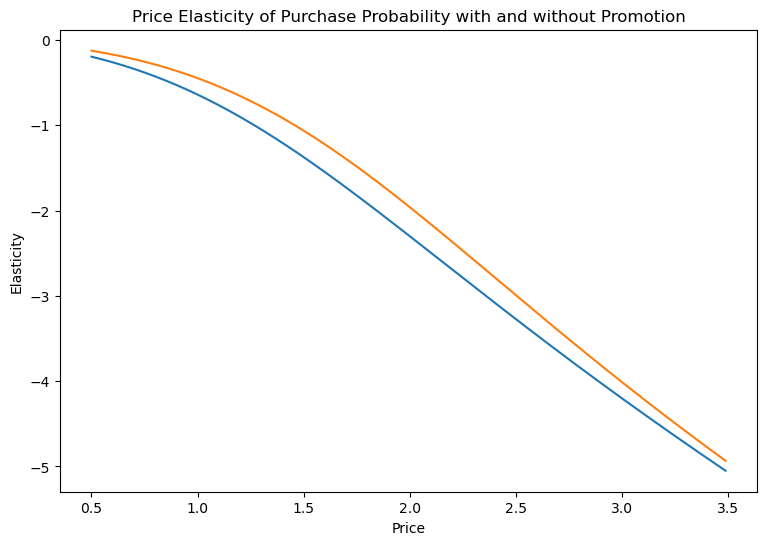

In [481]:
plt.figure(figsize=(9,6))
plt.plot(price_range,price_elasticity_no_promo)
plt.plot(price_range,price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')
plt.show()

## Brand Choice

#### Data Preparation

In [482]:
brand_choice =df_pa[df_pa['Incidence']==1]

In [483]:
pd.options.display.max_rows=100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,3,False,False,False,True
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,3,False,False,False,True
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,3,False,False,False,True
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,3,False,False,False,True
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,3,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,2.18,2.69,0,0,0,0,0,0,0,42,1,120946,1,0,3,False,False,False,True
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,2.21,2.70,1,1,0,0,0,0,0,42,1,120946,1,0,3,False,False,False,True
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,2.24,2.79,1,1,0,0,0,0,0,42,1,120946,1,0,3,False,False,False,True
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,2.24,2.78,0,0,0,0,0,0,0,42,1,120946,1,0,3,False,False,False,True


In [484]:
Y=brand_choice['Brand']

In [485]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [486]:
features=['Price_1','Price_2','Price_3','Price_4','Price_5']
X=brand_choice[features]

In [487]:
model_brand_choice=LogisticRegression(solver='sag',multi_class='multinomial')
model_brand_choice.fit(X,Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [488]:
model_brand_choice.coef_

array([[-3.91595082,  0.65846515,  2.41775431,  0.70408956, -0.20209604],
       [ 1.27461545, -1.87985438, -0.21263331, -0.2063385 ,  0.58787534],
       [ 1.62417128,  0.56210042,  0.50081233,  1.03949579,  0.45275899],
       [ 0.57454081,  0.39558914, -1.40059371, -1.24624164,  0.24935639],
       [ 0.44262328,  0.26369968, -1.30533963, -0.29100521, -1.08789468]])

In [489]:
bc_coef=pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915951,0.658465,2.417754,0.704090,-0.202096
1,1.274615,-1.879854,-0.212633,-0.206338,0.587875
2,1.624171,0.562100,0.500812,1.039496,0.452759
3,0.574541,0.395589,-1.400594,-1.246242,0.249356
4,0.442623,0.263700,-1.305340,-0.291005,-1.087895


In [490]:
bc_coef=pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients=['Coef_Brand_1','Coef_Brand_2','Coef_Brand_3','Coef_Brand_4','Coef_Brand_5']
bc_coef.columns = [coefficients]
prices=['Price_1','Price_2','Price_3','Price_4','Price_5']
bc_coef.index = [prices]
bc_coef=bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


## Own Price Elasticity Brand 5

In [491]:
df_own_brand_5 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_5['Price_1']=brand_choice['Price_1'].mean()
df_own_brand_5['Price_2']=brand_choice['Price_2'].mean()
df_own_brand_5['Price_3']=brand_choice['Price_3'].mean()
df_own_brand_5['Price_4']=brand_choice['Price_4'].mean()
df_own_brand_5['Price_5']=price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [492]:
predict_brand_5=model_brand_choice.predict_proba(df_own_brand_5)

In [493]:
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [494]:
beta5=bc_coef.iloc[4,4]
beta5

-1.09

In [495]:
own_price_elasticity_brand_5 = beta5 * price_range * (1-pr_own_brand_5)

In [496]:
df_price_elasticities['Brand_5']=own_price_elasticity_brand_5
pd.options.display.max_rows= None
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096414,-0.119086,-0.168009,-0.211248,-0.030940,-0.125739,-0.195649,-0.049055
1,0.51,-0.100482,-0.123269,-0.172932,-0.217816,-0.032709,-0.129855,-0.201771,-0.050616
2,0.52,-0.104678,-0.127546,-0.177926,-0.224491,-0.034564,-0.134050,-0.207995,-0.052207
3,0.53,-0.109004,-0.131917,-0.182990,-0.231275,-0.036510,-0.138325,-0.214322,-0.053827
4,0.54,-0.113463,-0.136385,-0.188126,-0.238168,-0.038551,-0.142681,-0.220753,-0.055477
5,0.55,-0.118058,-0.140950,-0.193334,-0.245170,-0.040691,-0.147119,-0.227289,-0.057158
6,0.56,-0.122794,-0.145615,-0.198614,-0.252284,-0.042935,-0.151640,-0.233931,-0.058871
7,0.57,-0.127673,-0.150380,-0.203967,-0.259508,-0.045287,-0.156245,-0.240679,-0.060614
8,0.58,-0.132698,-0.155248,-0.209392,-0.266844,-0.047752,-0.160935,-0.247535,-0.062391
9,0.59,-0.137874,-0.160219,-0.214892,-0.274293,-0.050334,-0.165710,-0.254498,-0.064199


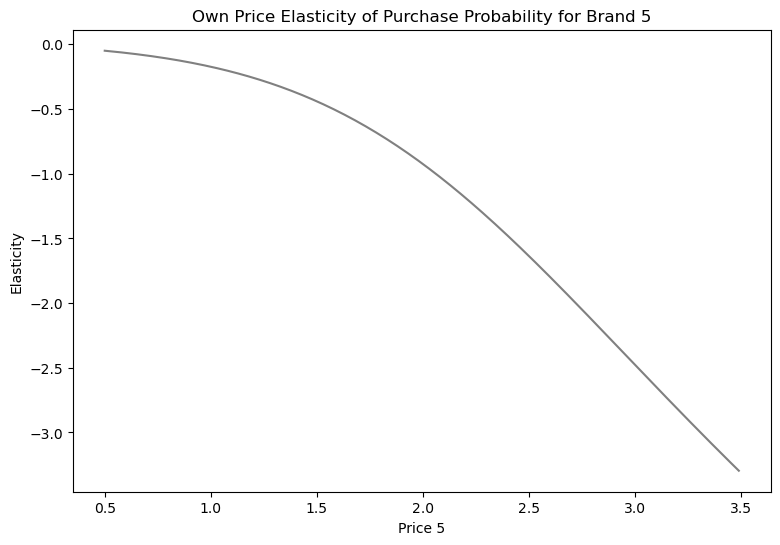

In [497]:
plt.figure(figsize=(9,6))
plt.plot(price_range,own_price_elasticity_brand_5,color='grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')
plt.show()

## Cross Price Elasticity Brand 5, Cross Brand 4

In [498]:
df_brand5_cross_brand4 = pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand4['Price_1']=brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2']=brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3']=brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4']=price_range
df_brand5_cross_brand4['Price_5']=brand_choice['Price_5'].mean()

In [499]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [500]:
predict_brand5_cross_brand4=model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [501]:
pr_brand_4 =predict_brand5_cross_brand4[:][:, 3]

In [502]:
beta5

-1.09

In [503]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range*pr_brand_4

In [504]:
df_price_elasticities['Brand_5_Cross_Brand_4']=brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096414,-0.119086,-0.168009,-0.211248,-0.030940,-0.125739,-0.195649,-0.049055,0.332011
1,0.51,-0.100482,-0.123269,-0.172932,-0.217816,-0.032709,-0.129855,-0.201771,-0.050616,0.337288
2,0.52,-0.104678,-0.127546,-0.177926,-0.224491,-0.034564,-0.134050,-0.207995,-0.052207,0.342507
3,0.53,-0.109004,-0.131917,-0.182990,-0.231275,-0.036510,-0.138325,-0.214322,-0.053827,0.347669
4,0.54,-0.113463,-0.136385,-0.188126,-0.238168,-0.038551,-0.142681,-0.220753,-0.055477,0.352773
5,0.55,-0.118058,-0.140950,-0.193334,-0.245170,-0.040691,-0.147119,-0.227289,-0.057158,0.357820
6,0.56,-0.122794,-0.145615,-0.198614,-0.252284,-0.042935,-0.151640,-0.233931,-0.058871,0.362809
7,0.57,-0.127673,-0.150380,-0.203967,-0.259508,-0.045287,-0.156245,-0.240679,-0.060614,0.367741
8,0.58,-0.132698,-0.155248,-0.209392,-0.266844,-0.047752,-0.160935,-0.247535,-0.062391,0.372614
9,0.59,-0.137874,-0.160219,-0.214892,-0.274293,-0.050334,-0.165710,-0.254498,-0.064199,0.377430


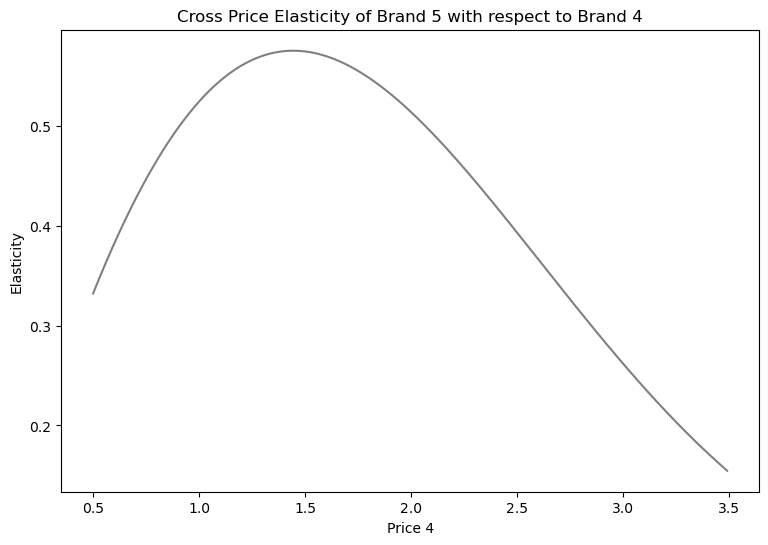

In [505]:
plt.figure(figsize=(9,6))
plt.plot(price_range,brand5_cross_brand4_price_elasticity,color='grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 with respect to Brand 4')
plt.show()

## Own and Cross- Price Elasticity by Segemnt

### Well_off

In [506]:
brand_choice_s2=df_pa[df_pa['Incidence']==1]
brand_choice_s2=brand_choice_s2[brand_choice_s2['Segment']==2]
pd.options.display.max_rows=100
brand_choice_s2

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,2.09,2.66,0,0,0,0,0,1,1,52,2,159052,2,1,2,False,False,True,False
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,2.12,2.67,0,0,0,1,0,1,1,52,2,159052,2,1,2,False,False,True,False
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,2.14,2.64,0,0,0,0,0,1,1,52,2,159052,2,1,2,False,False,True,False
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,2.03,2.68,1,0,0,1,0,1,1,52,2,159052,2,1,2,False,False,True,False
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,2.21,2.65,0,0,0,1,0,1,1,52,2,159052,2,1,2,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,2.24,2.78,0,0,0,0,0,1,1,44,2,193816,2,1,2,False,False,True,False
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,2.24,2.77,0,1,0,0,0,1,1,44,2,193816,2,1,2,False,False,True,False
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,2.24,2.76,0,0,1,0,0,1,1,44,2,193816,2,1,2,False,False,True,False
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,2.24,2.79,0,0,0,0,0,1,1,44,2,193816,2,1,2,False,False,True,False


In [507]:
# Brand Choice Model estimation.
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


## Own-Brand Price Elasticity


In [508]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities['Brand 5 S2'] = own_price_elasticity_brand_5_s2

## Cross-Brand Price Elasticity

In [509]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

# Update master data frame to include the newly obtained cross-brand price elasticities.
brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities['Brand_5_Cross_Brand_4_S2'] = brand5_cross_brand4_price_elasticity_s2
pd.options.display.max_rows = None
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S2,Brand_5_Cross_Brand_4_S2
0,0.50,-0.096414,-0.119086,-0.168009,-0.211248,-0.030940,-0.125739,-0.195649,-0.049055,0.332011,-0.297322,0.482421
1,0.51,-0.100482,-0.123269,-0.172932,-0.217816,-0.032709,-0.129855,-0.201771,-0.050616,0.337288,-0.303368,0.491726
2,0.52,-0.104678,-0.127546,-0.177926,-0.224491,-0.034564,-0.134050,-0.207995,-0.052207,0.342507,-0.309424,0.501016
3,0.53,-0.109004,-0.131917,-0.182990,-0.231275,-0.036510,-0.138325,-0.214322,-0.053827,0.347669,-0.315491,0.510290
4,0.54,-0.113463,-0.136385,-0.188126,-0.238168,-0.038551,-0.142681,-0.220753,-0.055477,0.352773,-0.321569,0.519548
5,0.55,-0.118058,-0.140950,-0.193334,-0.245170,-0.040691,-0.147119,-0.227289,-0.057158,0.357820,-0.327659,0.528790
6,0.56,-0.122794,-0.145615,-0.198614,-0.252284,-0.042935,-0.151640,-0.233931,-0.058871,0.362809,-0.333760,0.538017
7,0.57,-0.127673,-0.150380,-0.203967,-0.259508,-0.045287,-0.156245,-0.240679,-0.060614,0.367741,-0.339874,0.547227
8,0.58,-0.132698,-0.155248,-0.209392,-0.266844,-0.047752,-0.160935,-0.247535,-0.062391,0.372614,-0.346000,0.556420
9,0.59,-0.137874,-0.160219,-0.214892,-0.274293,-0.050334,-0.165710,-0.254498,-0.064199,0.377430,-0.352140,0.565598


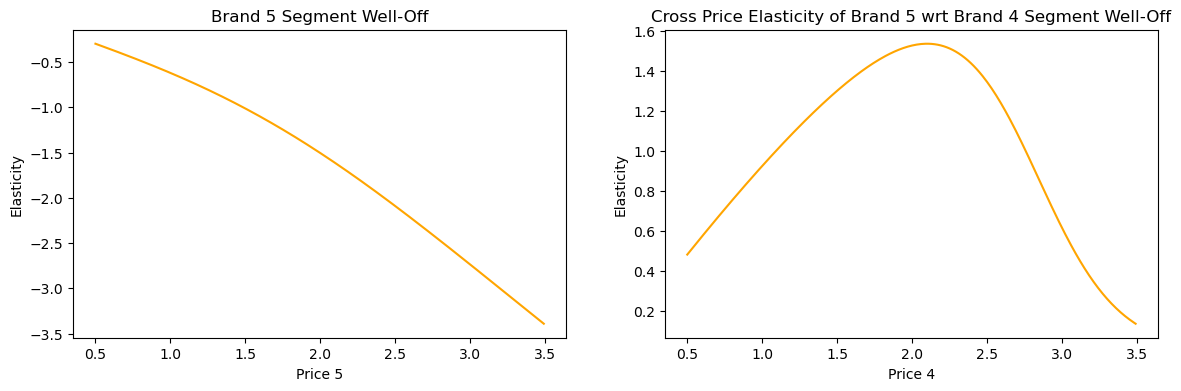

In [510]:
# Using a figure with axes we plot the own brand and cross-brand price elasticities for brand 5 cross brand 4 side by side.
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s2, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

## Standard

In [511]:
# Here we are interesting in analysing the brand choice probability of the Standard segment.
# We filter our data, by selecting only purchases from segment 0.
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
2398,200000024,44,1,2,2,0,0,1.35,1.58,1.97,2.09,2.67,1,1,1,0,0,1,1,32,1,88428,0,0,0,True,False,False,False
2403,200000024,98,1,2,2,0,0,1.47,1.90,1.95,2.12,2.67,0,0,0,0,0,1,1,32,1,88428,0,0,0,True,False,False,False
2408,200000024,143,1,2,3,0,0,1.21,1.35,1.99,2.16,2.67,1,1,0,0,0,1,1,32,1,88428,0,0,0,True,False,False,False
2410,200000024,162,1,2,5,0,0,1.39,1.90,1.94,2.16,2.49,1,0,0,0,0,1,1,32,1,88428,0,0,0,True,False,False,False
2417,200000024,217,1,5,1,0,0,1.34,1.89,1.99,2.13,2.67,0,0,0,0,0,1,1,32,1,88428,0,0,0,True,False,False,False


In [512]:
# Brand Choice Model estimation.
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

# Coefficients table segment 0.
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

## Own-Brand Price Elasticity

In [513]:
# Calculating own-brand price elasticity for brand 5 and the Standard segment.
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

# Compute price elasticities and update master data frame.
# We'd like to include the elasticities for the segments in order from 0 to three, which is why we use insert() on position 10.
own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

## Cross-Brand Price Elasticity

In [514]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Standard segment.
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

# Compute price elasticities and update master data frame.
# We need to use insert() on position 11, to save the price elasticities in the correct order.
brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

## Career-Focused

In [515]:
# Filter data by the Career-focused segment, which is the first segment.
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [516]:
# Brand Choice Model estimation.
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

# Coefficients table segment 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

## Own-Brand Price Elasticity

In [517]:
# Calculating own-brand price elasticity for brand 5 and the Career-focused segment.
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

## Cross-Brand Price Elasticity 

In [518]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Career-focused segment.
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

## Fewer-Opportunities

In [519]:
# Filter data, select only purchases from segment 3, which is the Fewer-Opportunities segment.
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

In [520]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

## Own-Brand Price Elasticity

In [521]:
# Calculating own-brand price elasticity for brand 5 and the Fewer-opportunities segment.
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities.insert(14, column = 'Brand 5 S3', value = own_price_elasticity_brand_5_s3)

## Cross-Brand Price Elasticity

In [522]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Fewer-opportunities segment.
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S3', value = brand5_cross_brand4_price_elasticity_s3)
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S3,Brand_5_Cross_Brand_4_S3,Brand 5 S2,Brand_5_Cross_Brand_4_S2
0,0.50,-0.096414,-0.119086,-0.168009,-0.211248,-0.030940,-0.125739,-0.195649,-0.049055,0.332011,-0.115837,0.174115,-0.043941,0.194767,-0.001036,0.181595,-0.297322,0.482421
1,0.51,-0.100482,-0.123269,-0.172932,-0.217816,-0.032709,-0.129855,-0.201771,-0.050616,0.337288,-0.118876,0.176171,-0.045028,0.197251,-0.001098,0.183892,-0.303368,0.491726
2,0.52,-0.104678,-0.127546,-0.177926,-0.224491,-0.034564,-0.134050,-0.207995,-0.052207,0.342507,-0.121950,0.178175,-0.046124,0.199684,-0.001163,0.186140,-0.309424,0.501016
3,0.53,-0.109004,-0.131917,-0.182990,-0.231275,-0.036510,-0.138325,-0.214322,-0.053827,0.347669,-0.125059,0.180129,-0.047229,0.202067,-0.001231,0.188340,-0.315491,0.510290
4,0.54,-0.113463,-0.136385,-0.188126,-0.238168,-0.038551,-0.142681,-0.220753,-0.055477,0.352773,-0.128204,0.182032,-0.048344,0.204399,-0.001303,0.190491,-0.321569,0.519548
5,0.55,-0.118058,-0.140950,-0.193334,-0.245170,-0.040691,-0.147119,-0.227289,-0.057158,0.357820,-0.131385,0.183886,-0.049468,0.206681,-0.001378,0.192593,-0.327659,0.528790
6,0.56,-0.122794,-0.145615,-0.198614,-0.252284,-0.042935,-0.151640,-0.233931,-0.058871,0.362809,-0.134602,0.185689,-0.050602,0.208913,-0.001458,0.194648,-0.333760,0.538017
7,0.57,-0.127673,-0.150380,-0.203967,-0.259508,-0.045287,-0.156245,-0.240679,-0.060614,0.367741,-0.137857,0.187444,-0.051746,0.211096,-0.001541,0.196655,-0.339874,0.547227
8,0.58,-0.132698,-0.155248,-0.209392,-0.266844,-0.047752,-0.160935,-0.247535,-0.062391,0.372614,-0.141149,0.189149,-0.052899,0.213231,-0.001629,0.198615,-0.346000,0.556420
9,0.59,-0.137874,-0.160219,-0.214892,-0.274293,-0.050334,-0.165710,-0.254498,-0.064199,0.377430,-0.144478,0.190806,-0.054062,0.215316,-0.001722,0.200528,-0.352140,0.565598


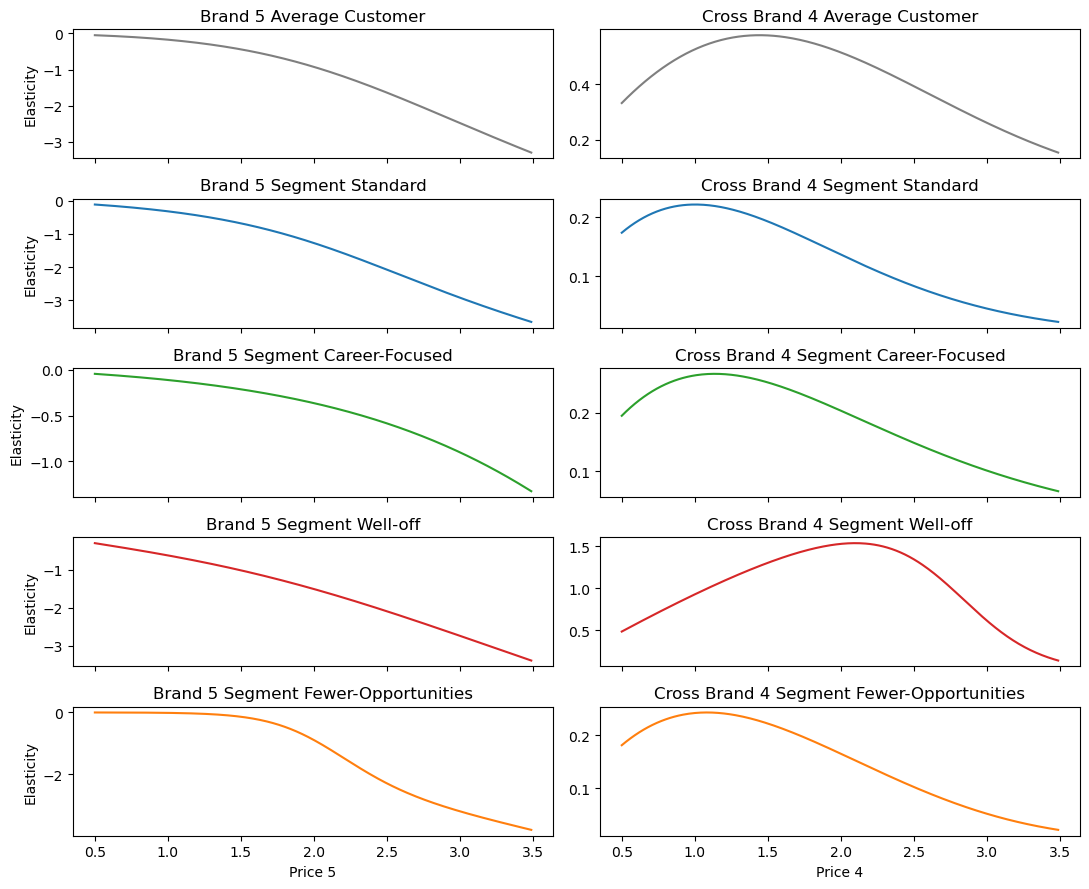

In [524]:
# We plot the own and cross brand price elasticities for the average customer and each of the four segments.
# We can observe differences and similiraties between the segments and examine their preference, when it comes to brand choice.
# The two segments, which seem to be of most interested for the marketing team of brand 5, seem to be the Career-focused
# and the Well-off. They are also the segments which purchase this brand most often. 
# The Career-focused segment is the most inelastic and they are the most loyal segment. 
# Based on our model, they do not seem to be that affected by price, therefore brand 5 could increase its price, 
# without fear of significant loss of customers from this segment. 
# The Well-off segment on the other hand, seems to be more elastic. They also purchase the competitor brand 4 most often.
# In order to target this segment, our analysis signals, that price needs to be decreased. However, keep in mind 
# that other factors aside from price might be influencing the purchase behaivour of this segment.
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Well-off')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Well-off')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')
ax5[1].set_xlabel('Price 4')
plt.tight_layout()

## Price Elasticity of Purchase Quantity

In [525]:
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,3,False,False,False,True
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,3,False,False,False,True
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,3,False,False,False,True
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,3,False,False,False,True
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,3,False,False,False,True


In [526]:
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,2.654296,0.372455,0.349638,0.043858,0.128091,0.045430,0.357289,0.385162,40.346905,1.151045,126706.452043,0.845471,0.797513,1.644077
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,0.097724,0.483475,0.476872,0.204787,0.334203,0.208252,0.479217,0.486650,12.346284,0.634625,39935.109358,0.633840,0.810358,1.080476
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,2.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,2.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,102723.000000,0.000000,0.000000,1.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,2.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,1.000000,122895.000000,1.000000,1.000000,2.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,2.700000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,49.000000,2.000000,147967.000000,1.000000,1.000000,3.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,2.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000,3.000000


In [527]:
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [528]:
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [529]:
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

## Model Estimation. Linear Regression

In [530]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [532]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [533]:
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [534]:
model_quantity.coef_

array([-0.8173651 , -0.10504673])

## Price Elasticity Estimation

In [535]:
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [536]:
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016685115

In [537]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [538]:
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [539]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S3,Brand_5_Cross_Brand_4_S3,Brand 5 S2,Brand_5_Cross_Brand_4_S2,PE_Quantity_Promotion_1
0,0.50,-0.096414,-0.119086,-0.168009,-0.211248,-0.030940,-0.125739,-0.195649,-0.049055,0.332011,-0.115837,0.174115,-0.043941,0.194767,-0.001036,0.181595,-0.297322,0.482421,-0.102157
1,0.51,-0.100482,-0.123269,-0.172932,-0.217816,-0.032709,-0.129855,-0.201771,-0.050616,0.337288,-0.118876,0.176171,-0.045028,0.197251,-0.001098,0.183892,-0.303368,0.491726,-0.104413
2,0.52,-0.104678,-0.127546,-0.177926,-0.224491,-0.034564,-0.134050,-0.207995,-0.052207,0.342507,-0.121950,0.178175,-0.046124,0.199684,-0.001163,0.186140,-0.309424,0.501016,-0.106679
3,0.53,-0.109004,-0.131917,-0.182990,-0.231275,-0.036510,-0.138325,-0.214322,-0.053827,0.347669,-0.125059,0.180129,-0.047229,0.202067,-0.001231,0.188340,-0.315491,0.510290,-0.108954
4,0.54,-0.113463,-0.136385,-0.188126,-0.238168,-0.038551,-0.142681,-0.220753,-0.055477,0.352773,-0.128204,0.182032,-0.048344,0.204399,-0.001303,0.190491,-0.321569,0.519548,-0.111238
5,0.55,-0.118058,-0.140950,-0.193334,-0.245170,-0.040691,-0.147119,-0.227289,-0.057158,0.357820,-0.131385,0.183886,-0.049468,0.206681,-0.001378,0.192593,-0.327659,0.528790,-0.113532
6,0.56,-0.122794,-0.145615,-0.198614,-0.252284,-0.042935,-0.151640,-0.233931,-0.058871,0.362809,-0.134602,0.185689,-0.050602,0.208913,-0.001458,0.194648,-0.333760,0.538017,-0.115836
7,0.57,-0.127673,-0.150380,-0.203967,-0.259508,-0.045287,-0.156245,-0.240679,-0.060614,0.367741,-0.137857,0.187444,-0.051746,0.211096,-0.001541,0.196655,-0.339874,0.547227,-0.118148
8,0.58,-0.132698,-0.155248,-0.209392,-0.266844,-0.047752,-0.160935,-0.247535,-0.062391,0.372614,-0.141149,0.189149,-0.052899,0.213231,-0.001629,0.198615,-0.346000,0.556420,-0.120471
9,0.59,-0.137874,-0.160219,-0.214892,-0.274293,-0.050334,-0.165710,-0.254498,-0.064199,0.377430,-0.144478,0.190806,-0.054062,0.215316,-0.001722,0.200528,-0.352140,0.565598,-0.122803


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

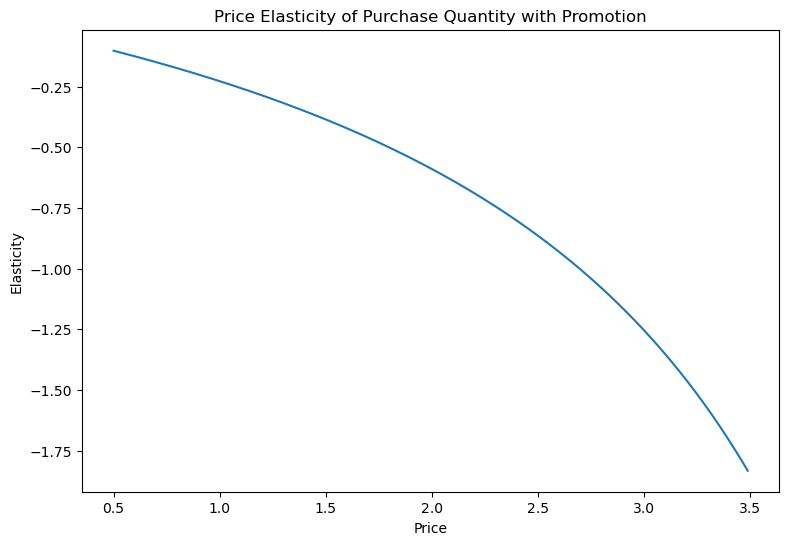

In [540]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

## Price Elasticity of Purchase Quantity

In [541]:
df_price_elasticity_quantity['Promotion_Incidence'] = 0

predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity

df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S3,Brand_5_Cross_Brand_4_S3,Brand 5 S2,Brand_5_Cross_Brand_4_S2,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096414,-0.119086,-0.168009,-0.211248,-0.030940,-0.125739,-0.195649,-0.049055,0.332011,-0.115837,0.174115,-0.043941,0.194767,-0.001036,0.181595,-0.297322,0.482421,-0.102157,-0.099543
1,0.51,-0.100482,-0.123269,-0.172932,-0.217816,-0.032709,-0.129855,-0.201771,-0.050616,0.337288,-0.118876,0.176171,-0.045028,0.197251,-0.001098,0.183892,-0.303368,0.491726,-0.104413,-0.101736
2,0.52,-0.104678,-0.127546,-0.177926,-0.224491,-0.034564,-0.134050,-0.207995,-0.052207,0.342507,-0.121950,0.178175,-0.046124,0.199684,-0.001163,0.186140,-0.309424,0.501016,-0.106679,-0.103939
3,0.53,-0.109004,-0.131917,-0.182990,-0.231275,-0.036510,-0.138325,-0.214322,-0.053827,0.347669,-0.125059,0.180129,-0.047229,0.202067,-0.001231,0.188340,-0.315491,0.510290,-0.108954,-0.106150
4,0.54,-0.113463,-0.136385,-0.188126,-0.238168,-0.038551,-0.142681,-0.220753,-0.055477,0.352773,-0.128204,0.182032,-0.048344,0.204399,-0.001303,0.190491,-0.321569,0.519548,-0.111238,-0.108369
5,0.55,-0.118058,-0.140950,-0.193334,-0.245170,-0.040691,-0.147119,-0.227289,-0.057158,0.357820,-0.131385,0.183886,-0.049468,0.206681,-0.001378,0.192593,-0.327659,0.528790,-0.113532,-0.110598
6,0.56,-0.122794,-0.145615,-0.198614,-0.252284,-0.042935,-0.151640,-0.233931,-0.058871,0.362809,-0.134602,0.185689,-0.050602,0.208913,-0.001458,0.194648,-0.333760,0.538017,-0.115836,-0.112836
7,0.57,-0.127673,-0.150380,-0.203967,-0.259508,-0.045287,-0.156245,-0.240679,-0.060614,0.367741,-0.137857,0.187444,-0.051746,0.211096,-0.001541,0.196655,-0.339874,0.547227,-0.118148,-0.115083
8,0.58,-0.132698,-0.155248,-0.209392,-0.266844,-0.047752,-0.160935,-0.247535,-0.062391,0.372614,-0.141149,0.189149,-0.052899,0.213231,-0.001629,0.198615,-0.346000,0.556420,-0.120471,-0.117339
9,0.59,-0.137874,-0.160219,-0.214892,-0.274293,-0.050334,-0.165710,-0.254498,-0.064199,0.377430,-0.144478,0.190806,-0.054062,0.215316,-0.001722,0.200528,-0.352140,0.565598,-0.122803,-0.119604


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

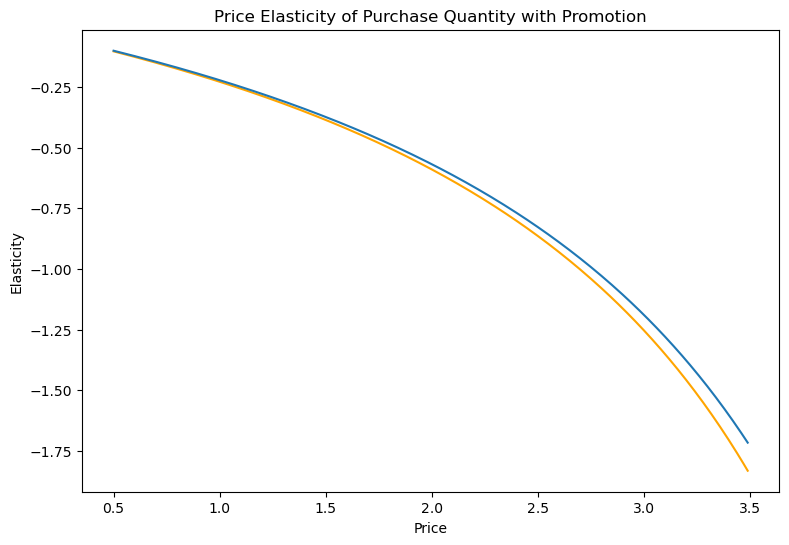

In [542]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')